In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"

sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [2]:
a=[66,74,82,75,73,97,87,78]
b=[72,51,59,62,74,64,78,63]
c=[61,30,57,60,81,77,70,71]
d=[63,61,76,84,58,65,69,80]
print("a 평균:",np.mean(a))
print("b 평균:",np.mean(b))
print("c 평균:",np.mean(c))
print("d 평균:",np.mean(d))

a 평균: 79.0
b 평균: 65.375
c 평균: 63.375
d 평균: 69.5


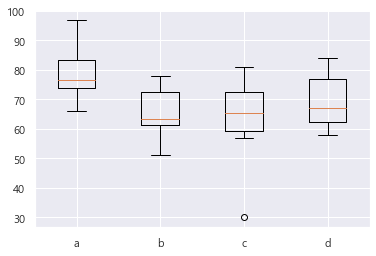

In [3]:
plot_data = [a,b,c,d]
plt.boxplot(plot_data)
plt.xticks([1,2,3,4], ['a','b','c','d'])
plt.grid(True)
plt.show()

In [5]:
check = ['a','b','c','d']
check = [check[j] for j in range(4) for i in range(8)]
data = pd.DataFrame({'점수' : a+b+c+d, '교육기관':check})
data.head(4)

,점수,교육기관
0,66,a
1,74,a
2,82,a
3,75,a


In [7]:
print(stats.ks_2samp(a,b), stats.ks_2samp(a,c), stats.ks_2samp(a,d),
      stats.ks_2samp(b,c), stats.ks_2samp(b,d),
      stats.ks_2samp(c,d), sep='\n')

print('등분산성 검정')
from scipy.stats import levene
print(levene(a,b,c,d))

from scipy.stats import bartlett
print(bartlett(a,b,c,d))

KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.5, pvalue=0.2826728826728826)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
등분산성 검정
LeveneResult(statistic=0.7101958814665997, pvalue=0.5540752176259733)
BartlettResult(statistic=3.3373462430353755, pvalue=0.3424784757344966)


In [8]:
f_statistic, pval = stats.f_oneway(a,b,c,d)

print('F={0:.1f}, p={1:.3f}'.format(f_statistic, pval))

if pval < 0.05:
    print('귀무가설 기각, 4개의 교육훈련 기법간의 차이가 있다.')
else:
    print('귀무가설 채택, 4개의 교육훈련 기법간의 차이가 없다.')

F=3.0, p=0.047
귀무가설 기각, 4개의 교육훈련 기법간의 차이가 있다.


In [9]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model_1A = ols('점수 ~C(교육기관)', data).fit()
anova_lm_result = anova_lm(model_1A)
anova_lm_result

,df,sum_sq,mean_sq,F,PR(>F)
C(교육기관),3.0,1157.125,385.708333,3.010197,0.046812
Residual,28.0,3587.750,128.133929,NaN,NaN


In [10]:
pval = anova_lm_result['PR(>F)'][0]

if pval < 0.05:
    print('귀무가설 기각, 4개의 교육훈련 기법간의 차이가 있다.')
else:
    print('귀무가설 채택, 4개의 교육ㅎㄴ련 기법간의 차이가 없다.')

귀무가설 기각, 4개의 교육훈련 기법간의 차이가 있다.


In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

NSD = pairwise_tukeyhsd(data['점수'], data['교육기관'], alpha=0.05)
NSD.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,-13.625,0.0988,-29.0781,1.8281,False
a,c,-15.625,0.0468,-31.0781,-0.1719,True
a,d,-9.5,0.3535,-24.9531,5.9531,False
b,c,-2.0,0.9845,-17.4531,13.4531,False
b,d,4.125,0.8847,-11.3281,19.5781,False
c,d,6.125,0.703,-9.3281,21.5781,False


In [20]:
dat=pd.DataFrame({'판유리':['유리1', '유리1', '유리1', '유리2', '유리2', '유리2', '유리3', '유리3', '유리3',
                          '유리1','유리1','유리1', '유리2', '유리2', '유리2', '유리3', '유리3', '유리3',
                          '유리1','유리1','유리1', '유리2', '유리2', '유리2', '유리3', '유리3', '유리3'],
                   '온도':[100, 100, 100, 100, 100, 100, 100, 100, 100, 125, 125, 125, 125, 125, 125, 125, 125, 125,
                         150, 150, 150, 150, 150, 150, 150, 150, 150],
                   '강도':[580, 568, 570, 550, 530, 579, 546, 575, 599, 1090, 1087, 1085, 1070,
                         1035, 1000, 1045, 1053, 1066, 1392, 1380, 1386, 1328, 1312, 1299, 867, 904, 889]
                   })

In [21]:
dat.head()

,판유리,온도,강도
0,유리1,100,580
1,유리1,100,568
2,유리1,100,570
3,유리2,100,550
4,유리2,100,530


In [22]:
dat.groupby(['판유리', '온도']).agg(len)

강도
판유리 온도     
유리1 100   3
    125   3
    150   3
유리2 100   3
    125   3
    150   3
유리3 100   3
    125   3
    150   3

In [25]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('강도 ~ C(판유리) * C(온도)', dat).fit()
anova_result = pd.DataFrame(anova_lm(model))

In [26]:
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(판유리),2.0,1.508645e+05,75432.259259,206.370554,3.886026e-13
C(온도),2.0,1.970335e+06,985167.259259,2695.259499,5.008957e-23
C(판유리):C(온도),4.0,2.905517e+05,72637.925926,198.725707,1.254188e-14
Residual,18.0,6.579333e+03,365.518519,NaN,NaN


In [27]:
dat['온도'] = dat['온도'].astype('str')
dat['combi'] = dat.판유리 + '/' + dat.온도
print(pairwise_tukeyhsd(dat['강도'], dat['combi']))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower     upper   reject
-----------------------------------------------------------
유리1/100 유리1/125  514.6667    0.0  459.9706  569.3627   True
유리1/100 유리1/150  813.3333    0.0  758.6373  868.0294   True
유리1/100 유리2/100  -19.6667 0.9307  -74.3627   35.0294  False
유리1/100 유리2/125  462.3333    0.0  407.6373  517.0294   True
유리1/100 유리2/150  740.3333    0.0  685.6373  795.0294   True
유리1/100 유리3/100    0.6667    1.0  -54.0294   55.3627  False
유리1/100 유리3/125     482.0    0.0  427.3039  536.6961   True
유리1/100 유리3/150     314.0    0.0  259.3039  368.6961   True
유리1/125 유리1/150  298.6667    0.0  243.9706  353.3627   True
유리1/125 유리2/100 -534.3333    0.0 -589.0294 -479.6373   True
유리1/125 유리2/125  -52.3333  0.067 -107.0294    2.3627  False
유리1/125 유리2/150  225.6667    0.0  170.9706  280.3627   True
유리1/125 유리3/100    -514.0    0.0 -568.6961 -459.3039   True
유리1/125 유리3/125  -32.6667 0.5066  -87.36